# Introduction

## Problem Statement

## Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, mean_squared_error, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy import stats




## Reading the Data

In [2]:
filename = 'bigml_59c28831336c6604c800002a.csv'
df = pd.read_csv(filename, index_col=0)
df.head()

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.tail()


,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
TN,74,415,400-4344,no,yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [4]:
df.shape

(3333, 20)

In [5]:
#Check for missing values
print(df.isnull().sum())

account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [6]:
print(df.dtypes)

account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [7]:
df.columns.tolist()

['account length',
 'area code',
 'phone number',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls',
 'churn']

In [8]:
df.dtypes

account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [9]:
df.dtypes

account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

## EDA

Distribution of subscribers by target attribute churn.
What is the percentage of loyal subscribers?

c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='churn', ylabel='count'>

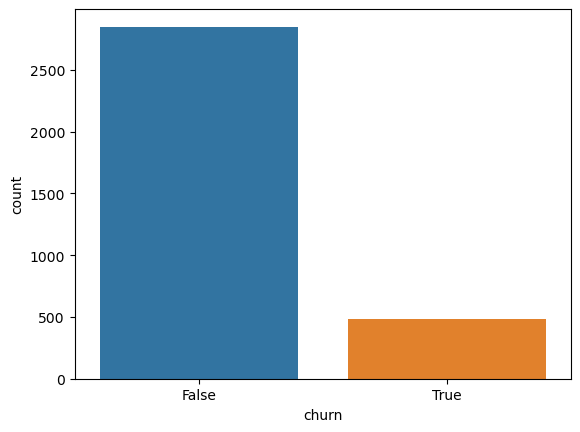

In [10]:
sns.countplot(data=df, x='churn')

In [11]:
df['churn'].value_counts(normalize=True)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

In [12]:
# State with the highest number of calls
all_calls = ['total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'customer service calls']
total_calls = df.groupby('state')[all_calls].sum().sum(axis=1).sort_values()

print('The state with the highest number of calls is :' , total_calls.idxmax() , total_calls.max())
print('The state with the lowest number of calls is :' , total_calls.idxmin() , total_calls.min())

The state with the highest number of calls is : WV 32682
The state with the lowest number of calls is : CA 10632


In [13]:
# Get descriptive statistics for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
description = df[numerical_cols].describe(include='all')
description

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


<Axes: >

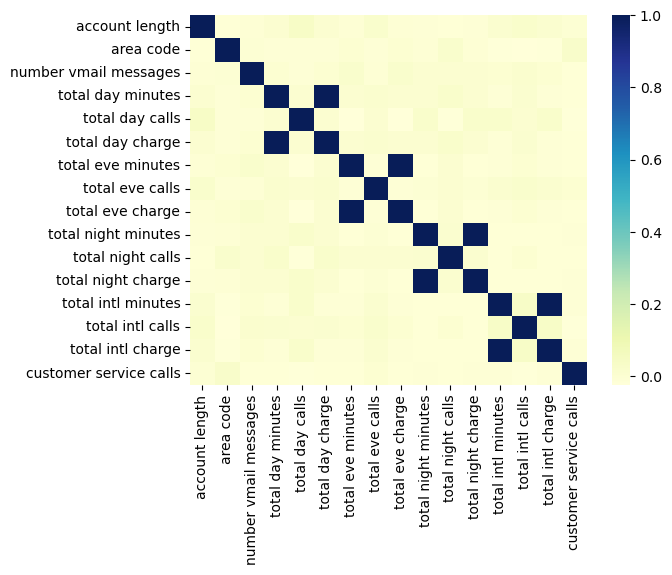

In [14]:
#Which numerical values have the highest degree of correlation
numeric_feats = df.dtypes[(df.dtypes != 'object') & (df.dtypes != 'bool')].index
sns.heatmap(df[numeric_feats].corr(), cmap="YlGnBu")

c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

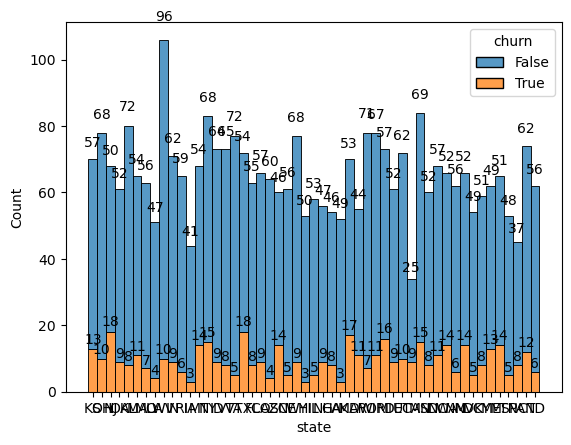

In [15]:
#State against churn count
# Create your stacked bar chart with sns.histplot
sns.histplot(binwidth=0.5, x="state", hue="churn", data=df, stat="count", multiple="stack")
# Get bar positions and heights
bars = plt.gca().patches  # Get all patches (bars) in the current axes

# Loop through each bar and add text label above it with count
for bar in bars:
  x, y, width, height = bar.get_bbox().bounds
  plt.text(x + width/2, y + height*1.05, int(height), ha='center', va='bottom')

# Display the chart
plt.show()



How voicemail and an international plan relate to subscriber loyalty

In [16]:
mail_tab = pd.crosstab(df['voice mail plan'], df['churn'])
mail_tab

churn,False,True
voice mail plan,,
no,2008,403
yes,842,80


In [17]:
int_plan_tab = pd.crosstab(df['international plan'], df['churn'])
int_plan_tab

churn,False,True
international plan,,
no,2664,346
yes,186,137


In [18]:
df['churn'] = df['churn'].astype(int)
df['churn'].dtype

dtype('int32')

c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


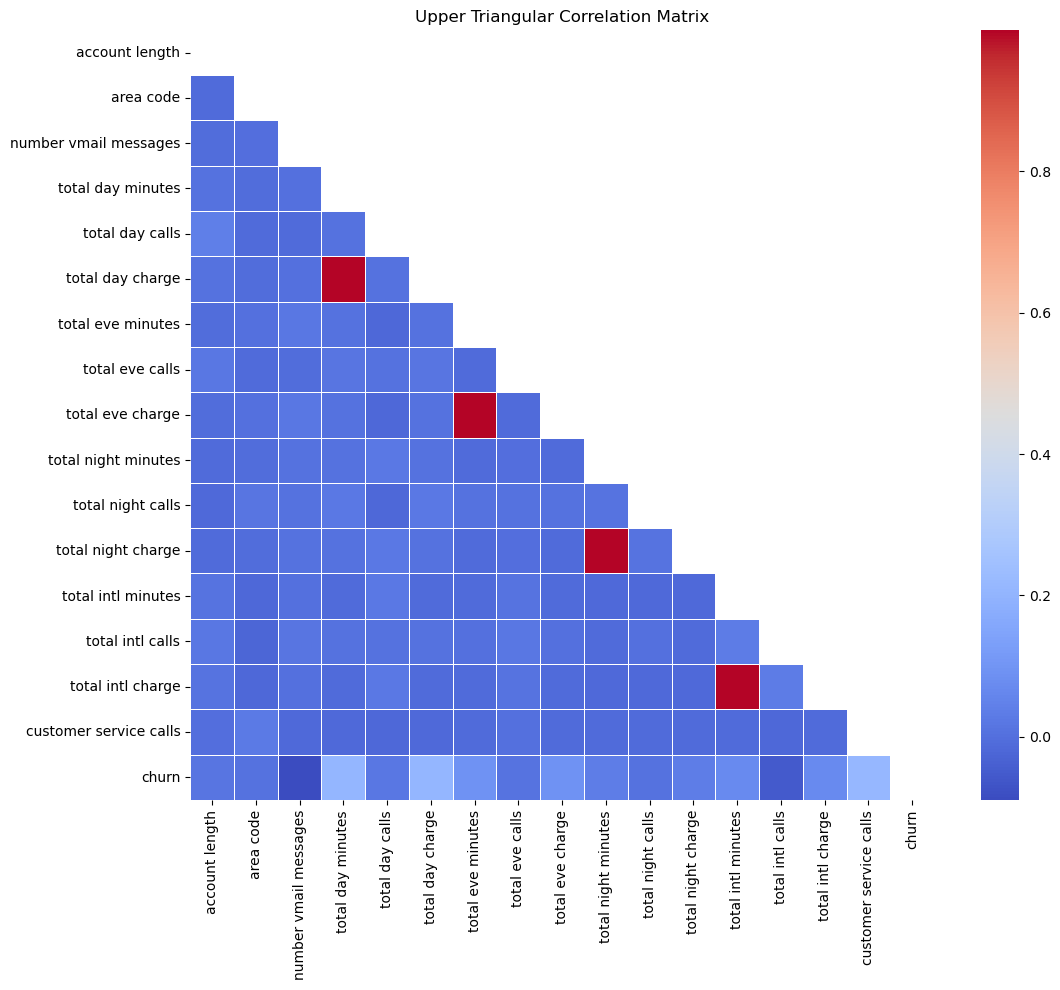

In [19]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64','int32']).columns
numeric_df = df[numeric_columns]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a mask for the upper triangular matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap for visualization with the mask
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('Upper Triangular Correlation Matrix')
plt.show()

In [20]:
print(stats.pointbiserialr(df['churn'], df['total day charge']))
print(stats.pointbiserialr(df['churn'], df['total eve charge']))
print(stats.pointbiserialr(df['churn'], df['total night charge']))

SignificanceResult(statistic=0.20515074317015242, pvalue=5.300605952412188e-33)
SignificanceResult(statistic=0.09278603942871307, pvalue=8.036524227776378e-08)
SignificanceResult(statistic=0.03549555624050648, pvalue=0.040451218769055254)


c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'People churning in different area codes')]

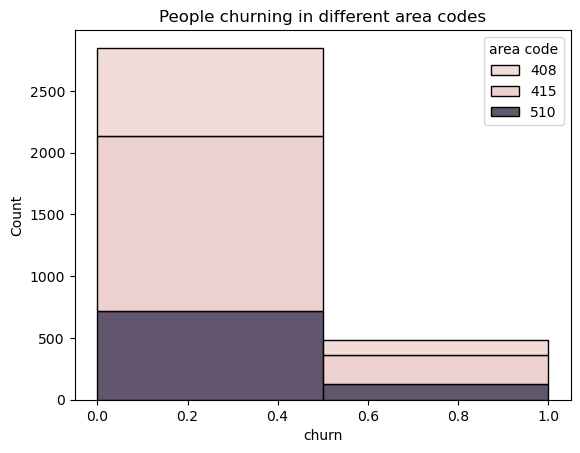

In [21]:
sns.histplot(binwidth=0.5, x="churn", hue="area code", data=df, stat="count", multiple="stack").set(title="People churning in different area codes")

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

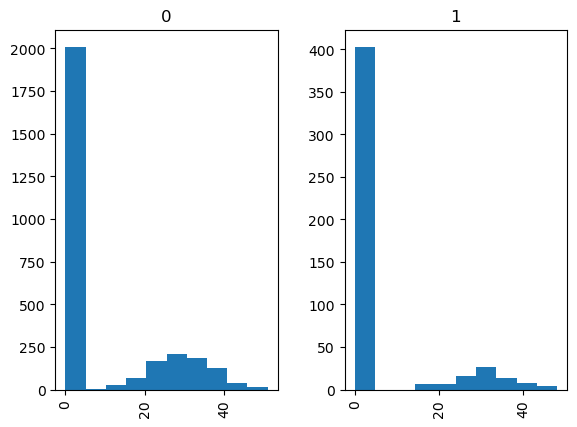

In [22]:
df.hist(by='churn', column='number vmail messages')

### Day, Night, Evening and International Calls
Checking if there is any correlation between whether a person churns or not v/s the day, night, evening and international calls

In [23]:
from scipy.stats import norm

def plotNormalDistribution(seriesName, titleName):
  
  mu = seriesName.mean()
  sigma = seriesName.std()

  density = pd.DataFrame()
  density["x"] = np.linspace(
      seriesName.min(), seriesName.max(), 100
  )
  density["pdf"] = norm.pdf(density["x"], mu, sigma)

  fig, ax = plt.subplots()
  sns.histplot(seriesName, ax=ax, kde=True, stat="density")
  ax.plot(density["x"], density["pdf"], color="red")
  plt.title(titleName)
  plt.show()

Day Calls

c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 1.0, 'Plot of average duration of day calls for churners and non-churners')]

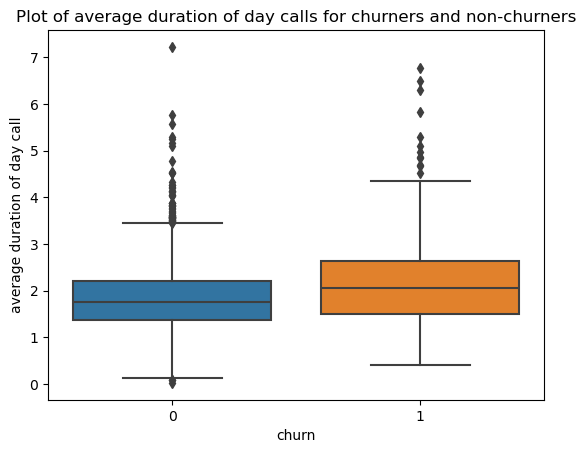

In [24]:
df['average duration of day call'] = df['total day minutes'] / df['total day calls']
df['average cost of day call'] = df['total day charge'] / df['total day calls']


sns.boxplot(x='churn', y='average duration of day call', data=df).set(title='Plot of average duration of day calls for churners and non-churners')

c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


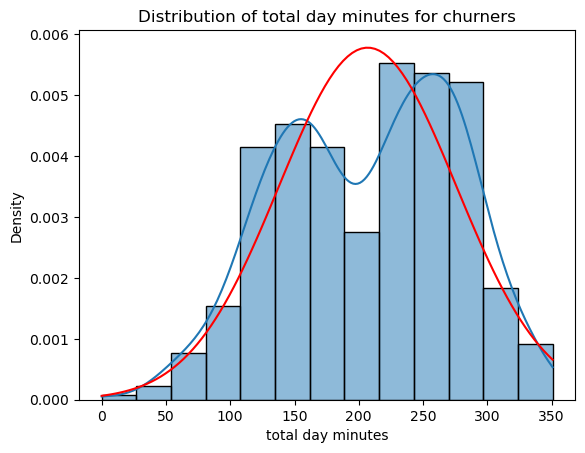

In [25]:
#Red colour is the predicted normal distribution whereas blue is the actual kernel density estimation
plotNormalDistribution(df[df['churn'] == True]['total day minutes'], 'Distribution of total day minutes for churners')

c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


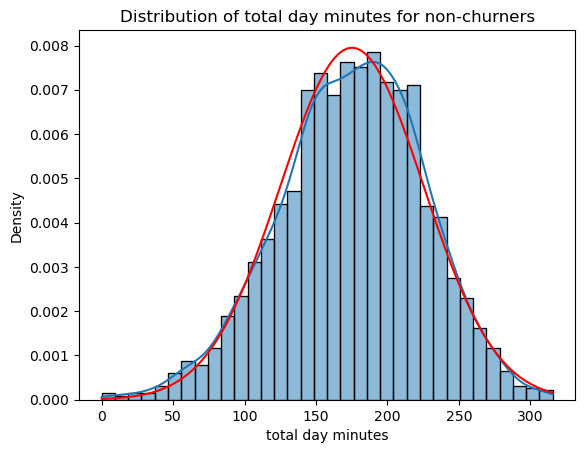

In [26]:
plotNormalDistribution(df[df['churn'] == False]['total day minutes'], 'Distribution of total day minutes for non-churners')

c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 1.0, 'Plot of average duration of evening calls for churners and non-churners')]

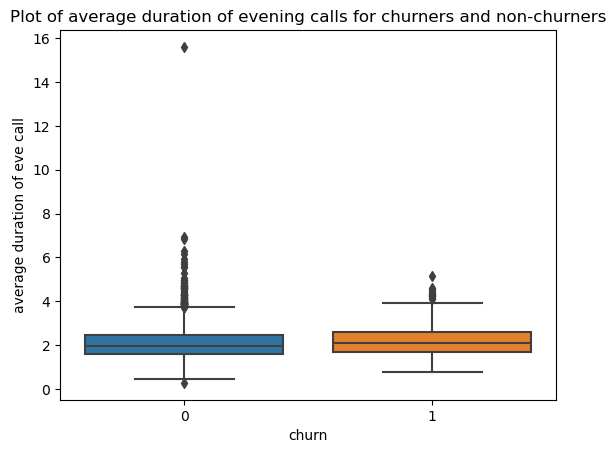

In [27]:
df['average duration of eve call'] = df['total eve minutes'] / df['total eve calls']
df['average cost of eve call'] = df['total eve charge'] / df['total eve calls']

sns.boxplot(x='churn', y='average duration of eve call', data=df).set(title='Plot of average duration of evening calls for churners and non-churners')

Night Calls

In [28]:
df['average duration of night call'] = df['total night minutes'] / df['total night calls']
df['average cost of night call'] = df['total night charge'] / df['total night calls']

c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


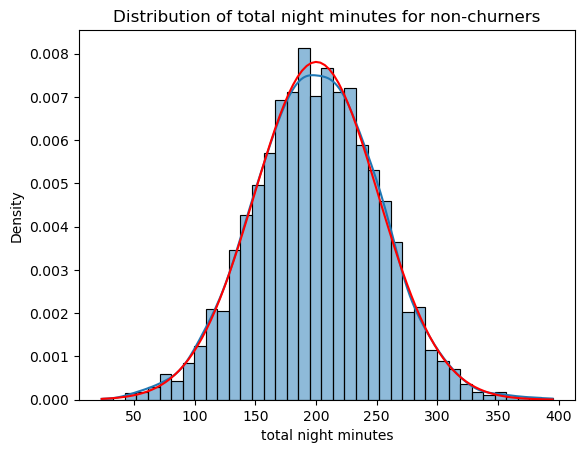

In [29]:
plotNormalDistribution(df[df['churn'] == False]['total night minutes'], 'Distribution of total night minutes for non-churners')

c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


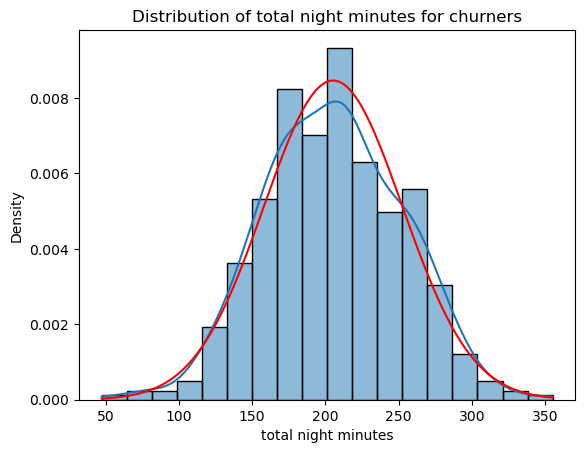

In [30]:
plotNormalDistribution(df[df['churn'] == True]['total night minutes'], 'Distribution of total night minutes for churners')

c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 1.0, 'Plot of average duration of night calls for churners and non-churners')]

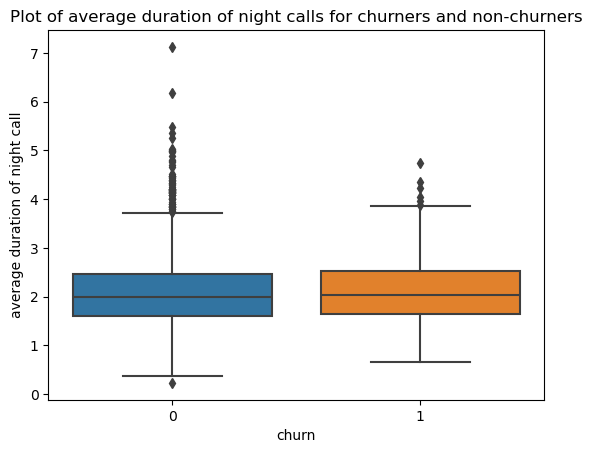

In [31]:
sns.boxplot(x='churn', y='average duration of night call', data=df).set(title='Plot of average duration of night calls for churners and non-churners')

c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 1.0, 'Plot of average cost of night calls for churners and non-churners')]

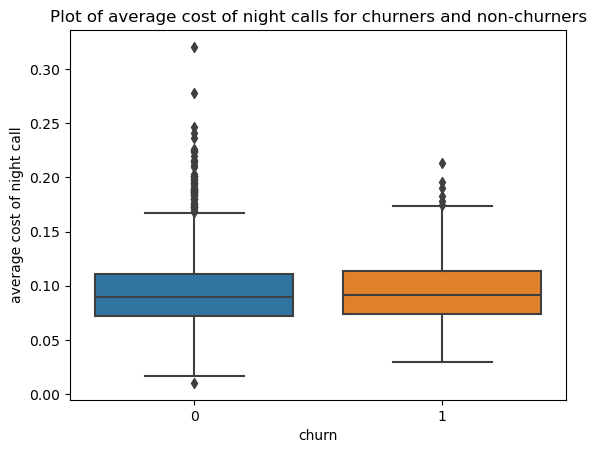

In [32]:
sns.boxplot(x='churn', y='average cost of night call', data=df).set(title='Plot of average cost of night calls for churners and non-churners')

Customer Service Calls

In [33]:
#Determining relationship between the number of calls to the customer service center and churn
stats.pointbiserialr(df['churn'], df['customer service calls'])

SignificanceResult(statistic=0.2087499987837928, pvalue=3.900360240192675e-34)

c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevan\anaconda3.1\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 1.0, 'Plot of customer service calls for churners and non-churners')]

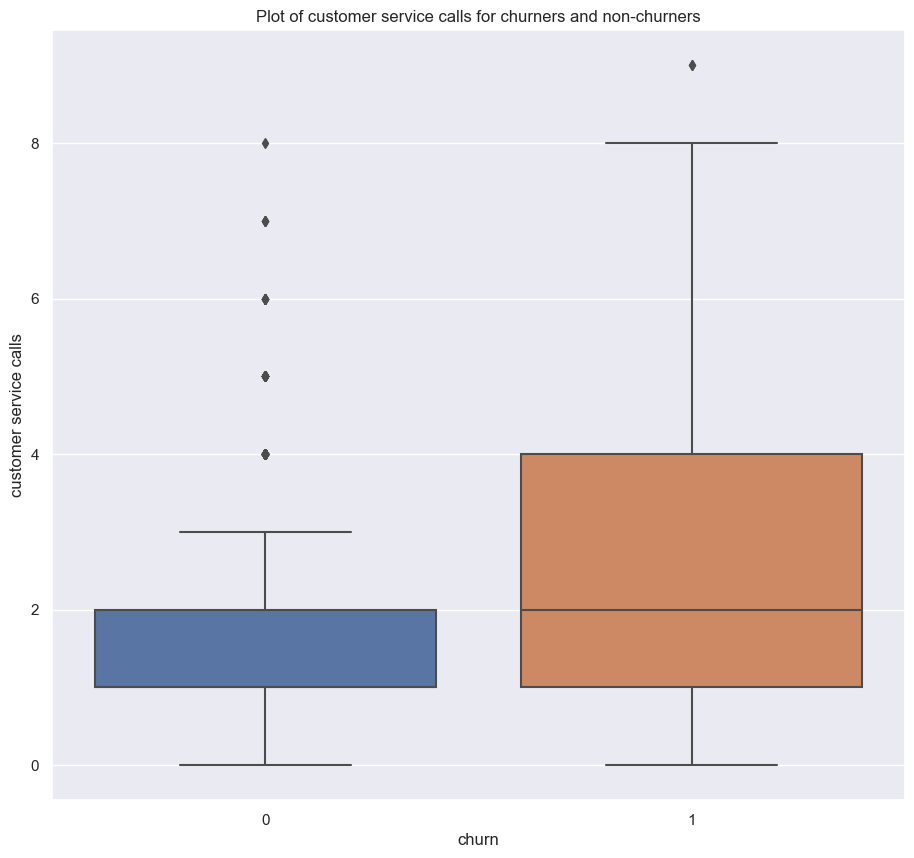

In [34]:
sns.set(rc={'figure.figsize':(11,10)})
sns.boxplot(x='churn', y='customer service calls', data=df).set(title='Plot of customer service calls for churners and non-churners')

Correlation across the different attributes
We perform correlation across the different attributes. We can clearly see that the total day minutes and total charge impacts whether a person will churn or not. Apart from that, there is not a lot of correlation which we can see in the dataset.

In [35]:
df['churn'].dtype

dtype('int32')

### Decision Trees

In [36]:
df.shape

(3333, 26)

In [37]:
df.dtypes

account length                      int64
area code                           int64
phone number                       object
international plan                 object
voice mail plan                    object
number vmail messages               int64
total day minutes                 float64
total day calls                     int64
total day charge                  float64
total eve minutes                 float64
total eve calls                     int64
total eve charge                  float64
total night minutes               float64
total night calls                   int64
total night charge                float64
total intl minutes                float64
total intl calls                    int64
total intl charge                 float64
customer service calls              int64
churn                               int32
average duration of day call      float64
average cost of day call          float64
average duration of eve call      float64
average cost of eve call          

In [38]:
ip, vmp = df['international plan'].map({'yes': 1, 'no': 0}), df['voice mail plan'].map({'yes': 1, 'no': 0})

df['international plan'], df['voice mail plan'] = ip, vmp
df['churn'] = df['churn'].astype('int')


df = pd.concat([df], axis=1) 
df.drop(['phone number'], axis=1, inplace=True)

df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total intl calls,total intl charge,customer service calls,churn,average duration of day call,average cost of day call,average duration of eve call,average cost of eve call,average duration of night call,average cost of night call
state,,,,,,,,,,,,,,,,,,,,,
KS,128,415,0,1,25,265.1,110,45.07,197.4,99,...,3,2.70,1,0,2.410000,0.409727,1.993939,0.169495,2.689011,0.120989
OH,107,415,0,1,26,161.6,123,27.47,195.5,103,...,3,3.70,1,0,1.313821,0.223333,1.898058,0.161359,2.469903,0.111165
NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,...,5,3.29,0,0,2.135088,0.362982,1.101818,0.093636,1.563462,0.070385
OH,84,408,1,0,0,299.4,71,50.90,61.9,88,...,7,1.78,2,0,4.216901,0.716901,0.703409,0.059773,2.212360,0.099551
OK,75,415,1,0,0,166.7,113,28.34,148.3,122,...,3,2.73,3,0,1.475221,0.250796,1.215574,0.103361,1.544628,0.069504


In [39]:
target = df.pop('churn')
target

state
KS    0
OH    0
NJ    0
OH    0
OK    0
     ..
AZ    0
WV    0
RI    0
CT    0
TN    0
Name: churn, Length: 3333, dtype: int32

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=12)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier() 
dt_model

DecisionTreeClassifier()

In [48]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
y_pred = dt_model.predict(X_test)

# Evaluation Metrics

- The following are nessecary evaluation metrics:

    1. classification_report

    2. confusion_matrix

    3. accuracy_score

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
